<a href="https://colab.research.google.com/github/FGalvao77/Prevendo-valores-de-acoes-com-tecnicas-de-Machine-Learning-e-Deep-Learning/blob/main/Prevendo_valores_de_a%C3%A7%C3%B5es_com_t%C3%A9cnicas_de_Machine_Learning_e_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prevendo _valores de ações_ com técnicas de `Machine Learning` e `Deep Learning`**
---



Nesse notebook, iremos explorar algumas técnicas de `Machine Learning` e `Deep Learning` para predição de valores de ações.

Utilizaremos a biblioteca [yfinance](https://pypi.org/project/yfinance/) para realizar a coleta dos dados diretamente do site [Yahoo! Finance](https://finance.yahoo.com/).

In [1]:
# instalando a biblioteca e realizando "upgrade" da mesma
!pip install yfinance --upgrade

     |████████████████████████████████| 6.4 MB 7.6 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Para nossa atividade, utilizaremos somente ações de empresas brasileiras negociadas na Bolsa de Valores de São Paulo, a conhecida [B3](https://www.b3.com.br/pt_br/).

In [2]:
# instanciando um dicionário de ações de empresas brasileiras
stocks = dict(
    WEG_SA = 'WEGE3.SA',
    Magazine_Luiza_SA = 'MGLU3.SA',
    VALE_SA = 'VALE3.SA', 
    Embraer_SA = 'EMBR3.SA',
    Petróleo_Brasileiro_SA = 'PETR3.SA',
    Gerdau_SA = 'GGBR3.SA',
    Americanas_SA = 'AMER3.SA', 
    Centrais_Eletricas_Brasileiras_SA = 'ELET3.SA',
    Usinas_Siderurgicas_de_Minas_Gerais_SA = 'USIM3.SA'
)

# visualizando o conteúdo do dicionário
stocks

{'Americanas_SA': 'AMER3.SA',
 'Centrais_Eletricas_Brasileiras_SA': 'ELET3.SA',
 'Embraer_SA': 'EMBR3.SA',
 'Gerdau_SA': 'GGBR3.SA',
 'Magazine_Luiza_SA': 'MGLU3.SA',
 'Petróleo_Brasileiro_SA': 'PETR3.SA',
 'Usinas_Siderurgicas_de_Minas_Gerais_SA': 'USIM3.SA',
 'VALE_SA': 'VALE3.SA',
 'WEG_SA': 'WEGE3.SA'}

In [3]:
# visualizando os valores das chaves do dicionário instanciado acima
stocks.values()

dict_values(['WEGE3.SA', 'MGLU3.SA', 'VALE3.SA', 'EMBR3.SA', 'PETR3.SA', 'GGBR3.SA', 'AMER3.SA', 'ELET3.SA', 'USIM3.SA'])

> Utilizaremos os valores do dicionário para coletar as informações das ações de interesse.

In [22]:
# importando as bibliotecas iniciais
import pandas as pd
import numpy as np
import yfinance as yf
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# configurando ambiente de exibição
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.set_printoptions(precision=4)
np.random.seed(42)
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = (15,9)
sns.set()

In [5]:
# realizando o download das infos das ações e, instanciando o resultado no objeto "df"
df = yf.download(list(stocks.values()))     # passando como argumento os valores da chave do dicionário

[*********************100%***********************]  9 of 9 completed


In [6]:
# visualizando o tipo do objeto criado
type(df)

pandas.core.frame.DataFrame

> Temos um `data frame` do _Pandas_.

In [7]:
# visualizando o nome das colunas presentes no objeto
df.columns

MultiIndex([('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'ELET3.SA'),
            ('Adj Close', 'EMBR3.SA'),
            ('Adj Close', 'GGBR3.SA'),
            ('Adj Close', 'MGLU3.SA'),
            ('Adj Close', 'PETR3.SA'),
            ('Adj Close', 'USIM3.SA'),
            ('Adj Close', 'VALE3.SA'),
            ('Adj Close', 'WEGE3.SA'),
            (    'Close', 'AMER3.SA'),
            (    'Close', 'ELET3.SA'),
            (    'Close', 'EMBR3.SA'),
            (    'Close', 'GGBR3.SA'),
            (    'Close', 'MGLU3.SA'),
            (    'Close', 'PETR3.SA'),
            (    'Close', 'USIM3.SA'),
            (    'Close', 'VALE3.SA'),
            (    'Close', 'WEGE3.SA'),
            (     'High', 'AMER3.SA'),
            (     'High', 'ELET3.SA'),
            (     'High', 'EMBR3.SA'),
            (     'High', 'GGBR3.SA'),
            (     'High', 'MGLU3.SA'),
            (     'High', 'PETR3.SA'),
            (     'High', 'USIM3.SA'),
            (     'High',

In [8]:
# visualizando as 5 primeiras observações do conjunto de dados
df.head()

Adj Close                                                        \
            AMER3.SA ELET3.SA EMBR3.SA GGBR3.SA MGLU3.SA PETR3.SA USIM3.SA   
Date                                                                         
2000-01-03       NaN   8.4450   6.0642      NaN      NaN   2.7767      NaN   
2000-01-04       NaN   8.0367   5.3377   0.1945      NaN   2.6208   1.5467   
2000-01-05       NaN   8.3591   5.5378   0.1945      NaN   2.6562   1.5467   
2000-01-06       NaN   8.1657   5.3599   0.1945      NaN   2.6350   1.0311   
2000-01-07       NaN   8.2946   5.5230   0.1945      NaN   2.6562   1.0483   

                                Close  ...     Open   Volume           \
           VALE3.SA WEGE3.SA AMER3.SA  ... WEGE3.SA AMER3.SA ELET3.SA   
Date                                   ...                              
2000-01-03   1.7960   0.1250      NaN  ...   0.1686      NaN     2336   
2000-01-04   1.7532   0.1207      NaN  ...   0.1642      NaN     1374   
2000-01-05   1.7532   0.1207      NaN  ...   0.1627      NaN     1625   
2000-01-06   1.7532   0.1097      NaN  ...   0.1479      NaN     1539   
2000-01-07   1.8174   0.1097      NaN  ...   0.1494      NaN     1337   

                                                                           \
           EMBR3.SA GGBR3.SA MGLU3.SA        PETR3.SA   USIM3.SA VALE3.SA   
Date                                                                        
2000-01-03  1121444      NaN      NaN 3998720000.0000        NaN   585600   
2000-01-04  1432068  10.0000      NaN 3098880000.0000     0.0000   782400   
2000-01-05  1100888   0.0000      NaN 6645760000.0000     0.0000  1876800   
2000-01-06   523036   0.0000      NaN 3303680000.0000  9000.0000   792000   
2000-01-07   480782   0.0000      NaN 2506240000.0000 20250.0000  5347200   

                     
           WEGE3.SA  
Date                 
2000-01-03   378560  
2000-01-04    47320  
2000-01-05        0  
2000-01-06   250120  
2000-01-07   135200  

[5 rows x 54 columns]

In [9]:
# visualizando as 5 últinas observações do conjunto de dados
df.tail()

Adj Close                                                        \
            AMER3.SA ELET3.SA EMBR3.SA GGBR3.SA MGLU3.SA PETR3.SA USIM3.SA   
Date                                                                         
2022-05-11   21.6000  39.7500  12.9700  20.8759   3.9300  36.4400   9.5800   
2022-05-12   22.6700  40.1600  13.3600  21.1975   4.1800  36.5800   9.6500   
2022-05-13   23.0500  41.3000  13.8600  21.2950   4.3800  36.6300   9.9100   
2022-05-16   23.6600  41.9200  13.4400  21.8700   4.3800  37.6600   9.9100   
2022-05-17   23.0200  43.5300  13.8200      NaN   3.9400  37.6900  10.3200   

                                Close  ...     Open        Volume           \
           VALE3.SA WEGE3.SA AMER3.SA  ... WEGE3.SA      AMER3.SA ELET3.SA   
Date                                   ...                                   
2022-05-11  78.6900  26.1000  21.6000  ...  26.1200  7459800.0000  4436300   
2022-05-12  77.9000  26.4100  22.6700  ...  26.1100 14329400.0000  4206000   
2022-05-13  77.8100  26.5000  23.0500  ...  26.7300 11745000.0000  5808900   
2022-05-16  80.1400  26.2000  23.6600  ...  26.5000  7460100.0000  3459000   
2022-05-17  79.8000  26.9100  23.0200  ...  26.5300  8393700.0000  6306500   

                                                                          \
            EMBR3.SA   GGBR3.SA       MGLU3.SA      PETR3.SA    USIM3.SA   
Date                                                                       
2022-05-11   9639700 51500.0000 140586300.0000 25063600.0000 576100.0000   
2022-05-12  12293900 49800.0000 193108900.0000 28681700.0000 437900.0000   
2022-05-13   9614600 47600.0000 140177600.0000 19959600.0000 409900.0000   
2022-05-16   7580300 58600.0000         0.0000 21906600.0000      0.0000   
2022-05-17  10691200        NaN 267660100.0000 17728100.0000 379800.0000   

                                
            VALE3.SA  WEGE3.SA  
Date                            
2022-05-11  33933400   8726100  
2022-05-12  27737200   8428100  
2022-05-13  26086800   6176600  
2022-05-16  23828800   7571800  
2022-05-17  29202500  10269400  

[5 rows x 54 columns]

Iremos trabalhar com as seguintes informações:
- `Adj Close`: valor ajustado.
- `Volume`: volume de papéis negociados.

In [23]:
# visualizando somente as colunas "Adj Close" e "Volume"
display(df['Adj Close'].head(), df['Volume'].head())

,AMER3.SA,ELET3.SA,EMBR3.SA,GGBR3.SA,MGLU3.SA,PETR3.SA,USIM3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,
2000-01-03,NaN,8.4450,6.0642,NaN,NaN,2.7767,NaN,1.7960,0.1250
2000-01-04,NaN,8.0367,5.3377,0.1945,NaN,2.6208,1.5467,1.7532,0.1207
2000-01-05,NaN,8.3591,5.5378,0.1945,NaN,2.6562,1.5467,1.7532,0.1207
2000-01-06,NaN,8.1657,5.3599,0.1945,NaN,2.6350,1.0311,1.7532,0.1097
2000-01-07,NaN,8.2946,5.5230,0.1945,NaN,2.6562,1.0483,1.8174,0.1097


,AMER3.SA,ELET3.SA,EMBR3.SA,GGBR3.SA,MGLU3.SA,PETR3.SA,USIM3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,
2000-01-03,NaN,2336,1121444,NaN,NaN,3998720000.0000,NaN,585600,378560
2000-01-04,NaN,1374,1432068,10.0000,NaN,3098880000.0000,0.0000,782400,47320
2000-01-05,NaN,1625,1100888,0.0000,NaN,6645760000.0000,0.0000,1876800,0
2000-01-06,NaN,1539,523036,0.0000,NaN,3303680000.0000,9000.0000,792000,250120
2000-01-07,NaN,1337,480782,0.0000,NaN,2506240000.0000,20250.0000,5347200,135200


In [24]:
# contabilizando a presença de valores nulos/ausentes
df.isnull().sum()

Adj Close  AMER3.SA    1362
           ELET3.SA       0
           EMBR3.SA       0
           GGBR3.SA       2
           MGLU3.SA    2880
           PETR3.SA      75
           USIM3.SA       1
           VALE3.SA       0
           WEGE3.SA       0
Close      AMER3.SA    1362
           ELET3.SA       0
           EMBR3.SA       0
           GGBR3.SA       2
           MGLU3.SA    2880
           PETR3.SA      75
           USIM3.SA       1
           VALE3.SA       0
           WEGE3.SA       0
High       AMER3.SA    1362
           ELET3.SA       0
           EMBR3.SA       0
           GGBR3.SA       2
           MGLU3.SA    2880
           PETR3.SA      75
           USIM3.SA       1
           VALE3.SA       0
           WEGE3.SA       0
Low        AMER3.SA    1362
           ELET3.SA       0
           EMBR3.SA       0
           GGBR3.SA       2
           MGLU3.SA    2880
           PETR3.SA      75
           USIM3.SA       1
           VALE3.SA       0
           WEGE3.SA 

In [25]:
# contabilizando a porcentagem de valores nulos e/ou ausentes em relação a quantidade total de observações do conjunto de dados
(df.isnull().sum() / df.shape[0]) * 100

Adj Close  AMER3.SA   24.2306
           ELET3.SA    0.0000
           EMBR3.SA    0.0000
           GGBR3.SA    0.0356
           MGLU3.SA   51.2364
           PETR3.SA    1.3343
           USIM3.SA    0.0178
           VALE3.SA    0.0000
           WEGE3.SA    0.0000
Close      AMER3.SA   24.2306
           ELET3.SA    0.0000
           EMBR3.SA    0.0000
           GGBR3.SA    0.0356
           MGLU3.SA   51.2364
           PETR3.SA    1.3343
           USIM3.SA    0.0178
           VALE3.SA    0.0000
           WEGE3.SA    0.0000
High       AMER3.SA   24.2306
           ELET3.SA    0.0000
           EMBR3.SA    0.0000
           GGBR3.SA    0.0356
           MGLU3.SA   51.2364
           PETR3.SA    1.3343
           USIM3.SA    0.0178
           VALE3.SA    0.0000
           WEGE3.SA    0.0000
Low        AMER3.SA   24.2306
           ELET3.SA    0.0000
           EMBR3.SA    0.0000
           GGBR3.SA    0.0356
           MGLU3.SA   51.2364
           PETR3.SA    1.3343
          

> Note que há muitos valores nulos/ausentes.

Vamos já tratar dos valores nulos/ausentes.

In [26]:
# removendo valores nulos/ausentes da base de dados através da linha de código que se segue
df.dropna(inplace=True)

# verificando se valores nulos/ausentes foram removidos
df.isnull().sum().any()    # retorno é uma resposta boleana | True = verdadeiro & False = falso

False

In [27]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2740 entries, 2011-05-02 to 2022-05-16
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, AMER3.SA)  2740 non-null   float64
 1   (Adj Close, ELET3.SA)  2740 non-null   float64
 2   (Adj Close, EMBR3.SA)  2740 non-null   float64
 3   (Adj Close, GGBR3.SA)  2740 non-null   float64
 4   (Adj Close, MGLU3.SA)  2740 non-null   float64
 5   (Adj Close, PETR3.SA)  2740 non-null   float64
 6   (Adj Close, USIM3.SA)  2740 non-null   float64
 7   (Adj Close, VALE3.SA)  2740 non-null   float64
 8   (Adj Close, WEGE3.SA)  2740 non-null   float64
 9   (Close, AMER3.SA)      2740 non-null   float64
 10  (Close, ELET3.SA)      2740 non-null   float64
 11  (Close, EMBR3.SA)      2740 non-null   float64
 12  (Close, GGBR3.SA)      2740 non-null   float64
 13  (Close, MGLU3.SA)      2740 non-null   float64
 14  (Close, PETR3.SA)      2740 non-null  

In [28]:
# "recortando" o valor ajustado após o fechamento (Adj Close) e salvando em um novo objeto "adj_close_df"
adj_close_df = df['Adj Close']

In [29]:
# visualizando as 20 primeiras observações do recorte do conjunto de dados
adj_close_df.head(20)

,AMER3.SA,ELET3.SA,EMBR3.SA,GGBR3.SA,MGLU3.SA,PETR3.SA,USIM3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,
2011-05-02,18.8752,11.3785,11.3027,10.3860,0.4632,18.4838,21.3376,28.2289,2.2724
2011-05-03,18.5248,11.3734,12.0199,10.2353,0.4589,18.3357,20.9694,27.5841,2.2060
2011-05-04,18.6912,11.4803,11.6931,10.0708,0.4640,18.2390,20.3786,27.0716,2.2049
2011-05-05,18.7438,11.6127,11.9836,9.8996,0.4612,17.7429,20.5156,27.4133,2.2108
2011-05-06,20.2328,11.6331,12.0653,10.0366,0.4578,17.5368,20.3957,27.4188,2.2226
2011-05-09,20.2941,11.7043,12.3376,9.9955,0.4533,17.9233,19.7878,27.6007,2.2049
2011-05-10,20.2941,11.7043,12.3376,9.9955,0.4533,17.9233,19.7878,27.6007,2.2049
2011-05-11,20.0489,11.4294,12.0744,9.9201,0.4618,17.5303,19.8648,26.6527,2.2120
2011-05-12,20.5831,11.4651,11.9473,10.0023,0.4623,17.3692,19.8905,26.7023,2.2463


In [30]:
# visualizando as 20 últimas observações
adj_close_df.tail(20)

,AMER3.SA,ELET3.SA,EMBR3.SA,GGBR3.SA,MGLU3.SA,PETR3.SA,USIM3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,
2022-04-18,28.3600,41.6890,13.5200,22.2598,5.8900,34.1200,11.2993,90.5700,31.9100
2022-04-19,28.0100,39.8534,14.0500,22.8543,5.9400,34.7100,11.6506,87.6800,31.3700
2022-04-20,27.2400,41.4239,13.9100,22.0259,5.6100,35.1200,10.8815,85.4000,31.4200
2022-04-22,26.6700,39.3724,13.7000,21.3145,5.5500,33.3700,10.5872,80.4500,31.3100
2022-04-25,26.3900,40.1100,14.0300,20.9734,5.4400,33.1400,10.6916,79.0800,31.2100
2022-04-26,25.0400,39.5400,13.6000,19.9793,5.1800,33.0900,10.2453,78.0000,29.9800
2022-04-27,25.0200,40.1800,13.4800,21.4704,5.1000,33.1900,10.3023,82.1700,31.6300
2022-04-28,25.2100,40.6600,14.3600,22.0844,5.1800,33.4300,10.7581,84.2000,31.1300
2022-04-29,24.0000,40.4800,14.2100,21.4314,4.8800,33.4400,10.5200,83.2900,30.1000


In [31]:
# função para realizar a normalização dos dados
def normalize(df):
    '''
    Função para realizar a normalização (escala) dos dados 
    '''
    x = df.copy()

    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

In [32]:
# aplicando a função no objeto "adj_close_df" e o resultado salvando em um novo objeto "normalized_df"
normalized_df = normalize(adj_close_df)
normalized_df.sample(15)    # visualizando 15 amostras aleatórias

,AMER3.SA,ELET3.SA,EMBR3.SA,GGBR3.SA,MGLU3.SA,PETR3.SA,USIM3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,
2017-06-22,11.1429,0.8821,1.3902,0.7009,1.9332,0.4976,0.3419,0.6967,2.7987
2019-07-26,34.9985,2.7652,1.7138,0.9267,16.5407,1.1026,0.4192,1.3620,4.9676
2019-10-03,47.1529,2.7436,1.5881,0.8500,19.5863,1.1332,0.3790,1.2322,5.0634
2011-08-08,10.7733,0.7348,0.6915,0.6234,0.6687,0.7346,0.8848,0.7772,0.7899
2016-03-28,14.1756,0.4967,2.0228,0.3389,0.2400,0.4053,0.1736,0.3763,2.1889
2011-05-06,20.2328,1.0224,1.0675,0.9664,0.9885,0.9488,0.9559,0.9713,0.9781
2013-05-07,10.3003,0.2710,1.4892,0.9278,0.5052,0.7203,0.3989,0.7664,1.5614
2012-03-26,7.8216,0.8137,1.1883,1.0390,0.7422,0.9031,0.8140,0.8524,1.0741
2015-11-18,13.8918,0.4267,2.4651,0.2994,0.0845,0.3630,0.2886,0.3619,2.1450


In [33]:
# com a função ".reset_index()" iremos redefinir a coluna do índice
normalized_df = normalized_df.reset_index()
normalized_df.head()    # visualizando as 5 primeiras observações

,Date,AMER3.SA,ELET3.SA,EMBR3.SA,GGBR3.SA,MGLU3.SA,PETR3.SA,USIM3.SA,VALE3.SA,WEGE3.SA
0,2011-05-02,18.8752,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,2011-05-03,18.5248,0.9996,1.0635,0.9855,0.9909,0.9920,0.9827,0.9772,0.9708
2,2011-05-04,18.6912,1.0089,1.0345,0.9697,1.0018,0.9868,0.9551,0.9590,0.9703
3,2011-05-05,18.7438,1.0206,1.0602,0.9532,0.9957,0.9599,0.9615,0.9711,0.9729
4,2011-05-06,20.2328,1.0224,1.0675,0.9664,0.9885,0.9488,0.9559,0.9713,0.9781


In [34]:
# importando a biblioteca "plotly" e juntamente a função ".express"
import plotly.express as px
# import plotly.figure_factory as ff

# função para realizar o "plot" do gráfico interativo
def interactive_plot(df, title):
    fig = px.line(title=title)

    for i in df.columns[1:]:
        fig.add_scatter(x=df['Date'], y=df[i], name=i)
    fig.show()

In [35]:
# aplicando a função no objeto "normalized_df" e visualizando graficamente o histórico da série temporal
interactive_plot(normalized_df, 'Stock Prices - Adj Close')

In [36]:
# função para realizar a seleção das "features" e da ação de interesse
def get_stock(price_df, volume_df, name):
    return pd.DataFrame({'Date':price_df['Date'], 'Close':price_df[name], 'Volume':volume_df[name]})

In [37]:
# "recortando" o atributo "Volume" e salvando o resultado no objeto "volume_df"
volume_df = df['Volume']

# resetando o índice do novo dataframe
volume_df = volume_df.reset_index()
volume_df.head()    # visualizando as 5 primeiras observações

,Date,AMER3.SA,ELET3.SA,EMBR3.SA,GGBR3.SA,MGLU3.SA,PETR3.SA,USIM3.SA,VALE3.SA,WEGE3.SA
0,2011-05-02,1160417.0000,1437946,1769600,638600.0000,280003200.0000,3811700.0000,582100.0000,4291100,5093660
1,2011-05-03,481828.0000,1387026,3545100,936800.0000,33670400.0000,6734400.0000,601100.0000,2769300,2363296
2,2011-05-04,709144.0000,815709,1984600,575200.0000,39203200.0000,4575400.0000,578100.0000,5822700,3665948
3,2011-05-05,449258.0000,1663331,1236000,1505300.0000,35097600.0000,6821600.0000,672800.0000,5286700,2692508
4,2011-05-06,1692499.0000,1452151,880100,2016900.0000,38672000.0000,4295100.0000,362200.0000,3748600,1793428


In [38]:
# aplicando a função "get_stock" nos objetos "adj_close_df" e "volume_df" para o papel "Vale.SA"
price_volume_df = get_stock(adj_close_df.reset_index(), volume_df, 'VALE3.SA')
price_volume_df # visualizando o novo objeto

,Date,Close,Volume
0,2011-05-02,28.2289,4291100
1,2011-05-03,27.5841,2769300
2,2011-05-04,27.0716,5822700
3,2011-05-05,27.4133,5286700
4,2011-05-06,27.4188,3748600
...,...,...,...
2735,2022-05-10,75.5400,31905000
2736,2022-05-11,78.6900,33933400
2737,2022-05-12,77.9000,27737200
2738,2022-05-13,77.8100,26086800


In [39]:
# visualizando se há presença de valores nulos/ausentes
price_volume_df.isnull().sum()

Date      0
Close     0
Volume    0
dtype: int64

In [40]:
# linha de código para realizar a contabilidade de porcentagem de valores nulos/ausentes em relação ao total de observações
(price_volume_df.isnull().sum() / price_volume_df.shape[0]) * 100

Date     0.0000
Close    0.0000
Volume   0.0000
dtype: float64

In [41]:
# se houver valores nulos/ausentes podemos remove-los da base de dados através da linha de código que se segue
price_volume_df.dropna(inplace=True)

# verificando se valores nulos/ausentes foram removidos
price_volume_df.isnull().sum().any()    # retorno é uma resposta boleana | True = verdadeiro & False = falso

False

In [42]:
# função para criar "feature" alvo
def trading_window(data):
    n=1
    data['Target'] = data[['Close']].shift(-n)
    return data

In [43]:
# aplicando a função acima e salvando o resultado no objeto "target_df"
target_df = trading_window(price_volume_df)
target_df.tail(20)    # visualizando 20 últimas observações do objeto

,Date,Close,Volume,Target
2720,2022-04-18,90.5700,14812600,87.6800
2721,2022-04-19,87.6800,34550900,85.4000
2722,2022-04-20,85.4000,29635700,80.4500
2723,2022-04-22,80.4500,39058200,79.0800
2724,2022-04-25,79.0800,38943700,78.0000
2725,2022-04-26,78.0000,37069400,82.1700
2726,2022-04-27,82.1700,49408800,84.2000
2727,2022-04-28,84.2000,56032800,83.2900
2728,2022-04-29,83.2900,47492200,82.9200
2729,2022-05-02,82.9200,31473600,82.5000


In [44]:
# realizando um "ajuste" nos valores da coluna "Target"
target_df = target_df[:-1]  # aqui estamos excluindo a última observação
target_df.tail(20) # visualizando 20 últimas observações do objeto

,Date,Close,Volume,Target
2719,2022-04-14,92.0900,24980700,90.5700
2720,2022-04-18,90.5700,14812600,87.6800
2721,2022-04-19,87.6800,34550900,85.4000
2722,2022-04-20,85.4000,29635700,80.4500
2723,2022-04-22,80.4500,39058200,79.0800
2724,2022-04-25,79.0800,38943700,78.0000
2725,2022-04-26,78.0000,37069400,82.1700
2726,2022-04-27,82.1700,49408800,84.2000
2727,2022-04-28,84.2000,56032800,83.2900
2728,2022-04-29,83.2900,47492200,82.9200


In [45]:
# importando a biblioteca para realizar o escalonamento dos dados
from sklearn.preprocessing import MinMaxScaler

# instanciando o objeto para realizar o escalonamento dos dados
mm_scal = MinMaxScaler(feature_range= (0,1))

# aplicando o objeto "sc" e escalando os dados e eliminando a coluna "Date"
scaled_df = mm_scal.fit_transform(target_df.drop(columns='Date'))
scaled_df[:20]  # visualizando os 20 primeiros dados

array([[2.3059e-01, 2.3380e-02, 2.2389e-01],
       [2.2389e-01, 1.5089e-02, 2.1857e-01],
       [2.1857e-01, 3.1725e-02, 2.2212e-01],
       [2.2212e-01, 2.8805e-02, 2.2217e-01],
       [2.2217e-01, 2.0424e-02, 2.2406e-01],
       [2.2406e-01, 3.6723e-06, 2.2406e-01],
       [2.2406e-01, 0.0000e+00, 2.1422e-01],
       [2.1422e-01, 1.8691e-02, 2.1473e-01],
       [2.1473e-01, 1.6213e-02, 2.1021e-01],
       [2.1021e-01, 1.3060e-02, 2.1021e-01],
       [2.1021e-01, 0.0000e+00, 2.1193e-01],
       [2.1193e-01, 1.0843e-02, 2.1279e-01],
       [2.1279e-01, 1.5957e-02, 2.1525e-01],
       [2.1525e-01, 1.5395e-02, 2.1645e-01],
       [2.1645e-01, 2.2509e-02, 2.1616e-01],
       [2.1616e-01, 1.0570e-02, 2.1880e-01],
       [2.1880e-01, 1.0590e-02, 2.1948e-01],
       [2.1948e-01, 1.1670e-02, 2.2389e-01],
       [2.2389e-01, 1.5338e-02, 2.2561e-01],
       [2.2561e-01, 1.7747e-02, 2.2440e-01]])

In [46]:
# visualizando a dimensão do objeto "scaled_df"
scaled_df.shape # linhas e colunas

(2739, 3)

In [47]:
# instanciando as variáveis explicativas e a resposta, X e y respectivamente
X = scaled_df[:, :2]    # instanciando os dados esclados das colunas "Close" e "Volume"
y = scaled_df[:, 2:]    # instanciando os dados da coluna "Target"

In [48]:
# visualizando as 20 primeiras observações do objeto "X"
X[:20]

array([[2.3059e-01, 2.3380e-02],
       [2.2389e-01, 1.5089e-02],
       [2.1857e-01, 3.1725e-02],
       [2.2212e-01, 2.8805e-02],
       [2.2217e-01, 2.0424e-02],
       [2.2406e-01, 3.6723e-06],
       [2.2406e-01, 0.0000e+00],
       [2.1422e-01, 1.8691e-02],
       [2.1473e-01, 1.6213e-02],
       [2.1021e-01, 1.3060e-02],
       [2.1021e-01, 0.0000e+00],
       [2.1193e-01, 1.0843e-02],
       [2.1279e-01, 1.5957e-02],
       [2.1525e-01, 1.5395e-02],
       [2.1645e-01, 2.2509e-02],
       [2.1616e-01, 1.0570e-02],
       [2.1880e-01, 1.0590e-02],
       [2.1948e-01, 1.1670e-02],
       [2.2389e-01, 1.5338e-02],
       [2.2561e-01, 1.7747e-02]])

In [49]:
# visualizando as 20 primeiras observações do objeto "y"
y[:20]

array([[0.2239],
       [0.2186],
       [0.2221],
       [0.2222],
       [0.2241],
       [0.2241],
       [0.2142],
       [0.2147],
       [0.2102],
       [0.2102],
       [0.2119],
       [0.2128],
       [0.2152],
       [0.2165],
       [0.2162],
       [0.2188],
       [0.2195],
       [0.2239],
       [0.2256],
       [0.2244]])

In [50]:
# dimensão dos objetos - linhas e colunas
X.shape, y.shape

((2739, 2), (2739, 1))

In [51]:
# instanciando o objeto "split" para realizar o particionamento dos dados de treino e teste
split = int(0.7 * (len(X)))

# aplicando o objeto: 70% dos dados para treino e, o restante, ou seja, 30% para teste do modelo
X_train = X[:split] 
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [52]:
# dimensão dos objetos - linhas e colunas
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1917, 2), (1917, 1), (822, 2), (822, 1))

In [53]:
# função para realizar o plot do gráfico
def show_plot(df, title):
    # plt.figure(figsize= (13,5))
    plt.title(title)
    plt.plot(df, linewidth= 3)
    plt.grid()

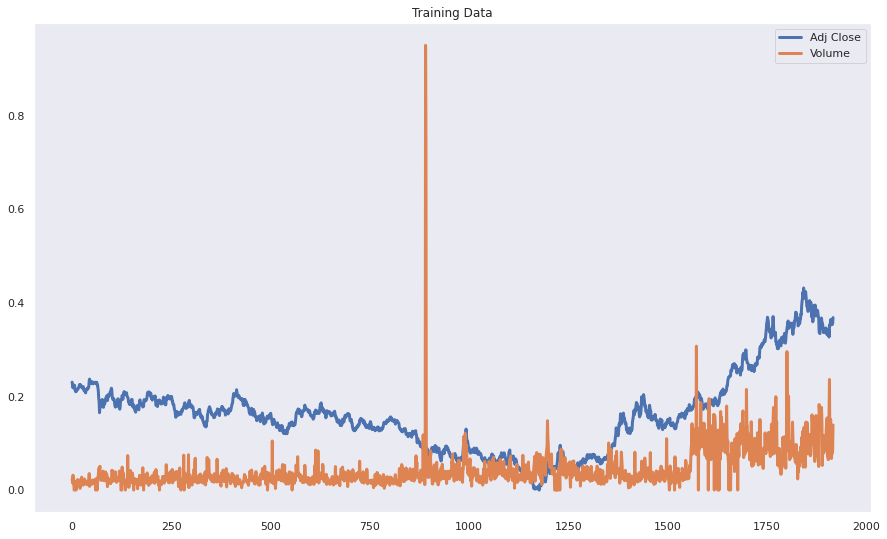

In [54]:
# aplicando a função nos dados "X_train"
show_plot(X_train, 'Training Data')
plt.legend(['Adj Close', 'Volume']);

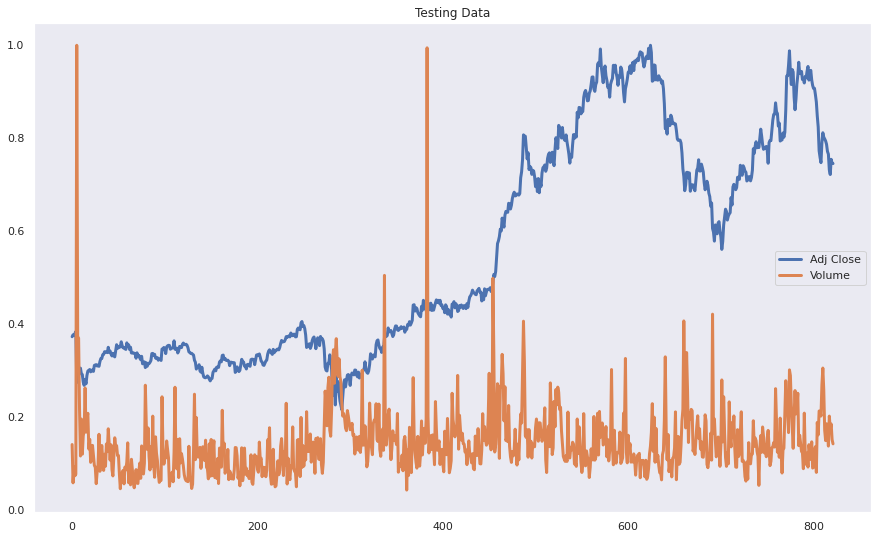

In [55]:
# aplicando a função nos dados "X_test"
show_plot(X_test,'Testing Data')
plt.legend(['Adj Close', 'Volume']);

**Ridge Regression**

Este modelo resolve um modelo de regressão onde a função de perda é a função linear dos mínimos quadrados e a regularização é dada pela `normalização L-2`. Também conhecido como Ridge Regression ou regularização de Tikhonov. Este estimador tem suporte embutido para regressão multivariada (ou seja, quando y é uma matriz 2d de forma (n_samples, n_targets)).

- [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

In [56]:
# impportando a função de regressão linear "Ridge"
from sklearn.linear_model import Ridge

In [57]:
# instanciando o modelo de regressão "Ridge"
mdl_ridge = Ridge(alpha=0.01,random_state=42)
mdl_ridge

Ridge(alpha=0.01, random_state=42)

In [58]:
# treinando o modelo nos dados de treino
mdl_ridge.fit(X_train, y_train)

Ridge(alpha=0.01, random_state=42)

In [59]:
# calculando acurácia do modelo nos dados de treino e visualizando o resultado
accuracy = mdl_ridge.score(X_train, y_train)
print('Ridge Regression score:', round(accuracy, 5))

Ridge Regression score: 0.9959


In [60]:
# calculando acurácia do modelo nos dados de teste e visualizando o resultado
accuracy = mdl_ridge.score(X_test, y_test)
print('Ridge Regression score:', round(accuracy, 5))

Ridge Regression score: 0.99572


In [61]:
# aplicando o modelo para realizar as predições
price_predictions = mdl_ridge.predict(X)
price_predictions[-20:]  # visualizando as 20 primeiras predições

array([[0.8927],
       [0.8768],
       [0.8471],
       [0.8234],
       [0.7722],
       [0.758 ],
       [0.7468],
       [0.7902],
       [0.8113],
       [0.8017],
       [0.7977],
       [0.7933],
       [0.7862],
       [0.7709],
       [0.7649],
       [0.7311],
       [0.7212],
       [0.7539],
       [0.7456],
       [0.7447]])

In [62]:
# realizando um laço de repetição para salvar as predições na lista "predicted"
predicted = []
for i in price_predictions:
    predicted.append(i[0])

In [63]:
# visualizando a quantidade de observações armazenadas na lista "predicted"
len(predicted)

2739

In [64]:
# realizando um laço de repetição para salvar os dados escalados na lista "close"
close = []
for i in scaled_df:
    close.append(i[0])

In [65]:
# visualizando a quantidade de observações armazenadas na lista "close"
len(close)

2739

In [66]:
# realizando a inserção "target[['Date']]" no data frame "df_predicted"
df_predicted = target_df[['Date']]
df_predicted    # visualizando o data frame

,Date
0,2011-05-02
1,2011-05-03
2,2011-05-04
3,2011-05-05
4,2011-05-06
...,...
2734,2022-05-09
2735,2022-05-10
2736,2022-05-11
2737,2022-05-12


In [67]:
# inserindo os dados da lista "close" no data frame "df_predicted"
df_predicted['Close'] = close
df_predicted    # visualizando o data frame

,Date,Close
0,2011-05-02,0.2306
1,2011-05-03,0.2239
2,2011-05-04,0.2186
3,2011-05-05,0.2221
4,2011-05-06,0.2222
...,...,...
2734,2022-05-09,0.7317
2735,2022-05-10,0.7218
2736,2022-05-11,0.7546
2737,2022-05-12,0.7464


In [68]:
# inserindo os dados da lista "predicted" no data frame "df_predicted"
df_predicted['Prediction'] = predicted
df_predicted    # visualizando o data frame

,Date,Close,Prediction
0,2011-05-02,0.2306,0.2305
1,2011-05-03,0.2239,0.2238
2,2011-05-04,0.2186,0.2185
3,2011-05-05,0.2221,0.2221
4,2011-05-06,0.2222,0.2221
...,...,...,...
2734,2022-05-09,0.7317,0.7311
2735,2022-05-10,0.7218,0.7212
2736,2022-05-11,0.7546,0.7539
2737,2022-05-12,0.7464,0.7456


In [69]:
# com a função criada, iremos visualizar a série temporal gerada pelo modelo "Ridge" - valores reais vs predito
interactive_plot(df_predicted, 'Original Price vs. Ridge Regression Predictions')

**LSTM**

In [92]:
# selecionando os papéis da "WEG.SA"
price_volume_df = get_stock(adj_close_df.reset_index(), volume_df, 'WEGE3.SA')

# visualizando as 20 últimas observações
price_volume_df.tail(20)

,Date,Close,Volume
2720,2022-04-18,31.9100,6937300
2721,2022-04-19,31.3700,12091000
2722,2022-04-20,31.4200,5515500
2723,2022-04-22,31.3100,10587900
2724,2022-04-25,31.2100,5920900
2725,2022-04-26,29.9800,11274900
2726,2022-04-27,31.6300,12950700
2727,2022-04-28,31.1300,7984900
2728,2022-04-29,30.1000,9606000
2729,2022-05-02,28.9400,12226000


In [93]:
# removendo valores nulos/ausentes da base de dados
price_volume_df.dropna(inplace=True)

# verificando se valores nulos/ausentes foram removidos
price_volume_df.isnull().sum().any()    # retorno é uma resposta boleana | True = verdadeiro & False = falso

False

In [94]:
# instanciando os dados de treinamento do modelo
training_data = price_volume_df.iloc[:, 1:3].values

# visualizando os 20 primeiros dados
training_data[:20]

array([[2.2724e+00, 5.0937e+06],
       [2.2060e+00, 2.3633e+06],
       [2.2049e+00, 3.6659e+06],
       [2.2108e+00, 2.6925e+06],
       [2.2226e+00, 1.7934e+06],
       [2.2049e+00, 1.2641e+04],
       [2.2049e+00, 0.0000e+00],
       [2.2120e+00, 9.4843e+05],
       [2.2463e+00, 2.0172e+06],
       [2.2700e+00, 4.3683e+06],
       [2.2700e+00, 0.0000e+00],
       [2.2606e+00, 1.8482e+06],
       [2.2049e+00, 3.5564e+06],
       [2.2226e+00, 1.0519e+06],
       [2.2108e+00, 1.3135e+06],
       [2.1752e+00, 1.0603e+07],
       [2.1740e+00, 4.6516e+06],
       [2.1491e+00, 3.7545e+06],
       [2.1551e+00, 5.2552e+06],
       [2.1314e+00, 2.5566e+06]])

In [101]:
# importando a função para realizar a padronização dos dados
from sklearn.preprocessing import MinMaxScaler

# instanciando a função no objeto "scaler"
scaled_data = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = scaled_data.fit_transform(training_data)

In [102]:
# separando as variávies explicativas e a resposta, para isso iremos realizar um laço de repetição
X = []
y = []

for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [104]:
# transformando os dados dos objetos "X" e "y" em um array do numpy
X = np.asarray(X)
y = np.asarray(y)

In [105]:
# visualizando se os objetos "X" e "y" foram transformados
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [107]:
# realizando as partições dos dados para o treino e teste do modelo
split = int(0.7 * len(X))

# 70% para treino e o restante, 30% para teste
X_train = X[:split]     
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [108]:
# realizando o "reshape" dos dados para aplicar o nosso modelo
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# visualizando a dimensão dos objetos
X_train.shape, X_test.shape

((1917, 1, 1), (822, 1, 1))

In [109]:
# importando a função para rna
from tensorflow import keras

In [110]:
# instanciando o rna
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='RNA_regressor')

# compilando a rede
model.compile(optimizer='adam', loss='mse')

# visualizando o sumário da rede
model.summary()

Model: "RNA_regressor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm_3 (LSTM)               (None, 1, 150)            91200     
                                                                 
 dropout_2 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_3 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_5 (LSTM)               (None, 150)               180600    
                                                                 
 dense_1 (Dense)             (None, 1)               

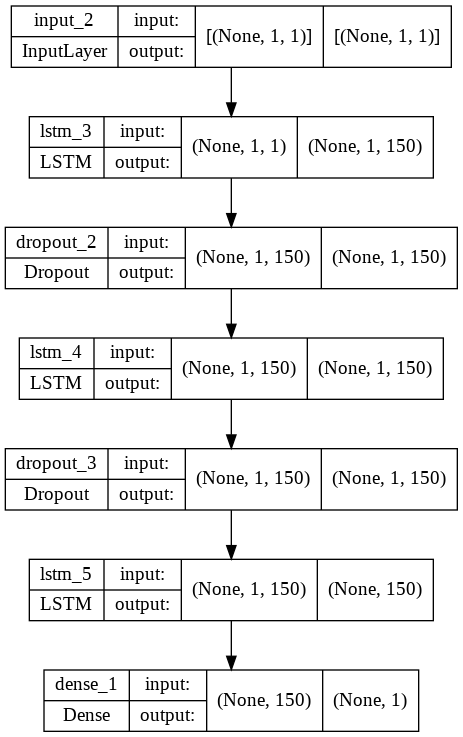

In [111]:
# plotando a estrutura da rede do modelo
keras.utils.plot_model(model, 'RNA_regressor.png', show_shapes=True)

In [112]:
# realizando o treinamento da rede e, salvando os resultados no objeto "history"
history = model.fit(
    x=X_train, y=y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
48/48 [==============================] - 15s 73ms/step - loss: 0.0013 - val_loss: 0.0075
Epoch 2/20
48/48 [==============================] - 1s 15ms/step - loss: 7.5439e-04 - val_loss: 9.7947e-04
Epoch 3/20
48/48 [==============================] - 1s 20ms/step - loss: 4.0678e-05 - val_loss: 4.0010e-05
Epoch 4/20
48/48 [==============================] - 1s 18ms/step - loss: 1.7706e-05 - val_loss: 1.4132e-05
Epoch 5/20
48/48 [==============================] - 1s 19ms/step - loss: 1.4591e-05 - val_loss: 1.1374e-05
Epoch 6/20
48/48 [==============================] - 1s 16ms/step - loss: 1.4985e-05 - val_loss: 1.4397e-05
Epoch 7/20
48/48 [==============================] - 1s 14ms/step - loss: 1.4754e-05 - val_loss: 1.9180e-05
Epoch 8/20
48/48 [==============================] - 1s 16ms/step - loss: 1.3521e-05 - val_loss: 1.2375e-05
Epoch 9/20
48/48 [==============================] - 1s 18ms/step - loss: 1.4446e-05 - val_loss: 1.5589e-05
Epoch 10/20
48/48 [=========================

In [113]:
# history = model.fit(x=X_train, y=y_train, batch_size=80, epochs=50, 
#                     validation_data=(X_test, y_test), shuffle=True, 
#                     validation_split=0.2)

In [114]:
# realizando as predições com o modelo
predicted = model.predict(X)

In [115]:
# salvando as predições em uma lista
test_predicted = []

for i in predicted:
    test_predicted.append(i[0])

test_predicted[:20]

[0.012047288,
 0.010568826,
 0.010542445,
 0.010674425,
 0.010938472,
 0.010542445,
 0.010542445,
 0.010700855,
 0.011466455,
 0.011994478,
 0.011994478,
 0.011783261,
 0.010542445,
 0.010938472,
 0.010674425,
 0.009882436,
 0.009856004,
 0.009301653,
 0.00943363,
 0.008905643]

In [116]:
# instanciando a data do objeto "price_volume" no objeto "df_predicted"
df_predicted = price_volume_df[1:][['Date']]
df_predicted.tail()

,Date
2735,2022-05-10
2736,2022-05-11
2737,2022-05-12
2738,2022-05-13
2739,2022-05-16


In [117]:
# instanciando os dados do objeto "test_predicted" no objeto "df_predicted"
df_predicted['predictions'] = test_predicted
df_predicted.tail()

,Date,predictions
2735,2022-05-10,0.5483
2736,2022-05-11,0.5368
2737,2022-05-12,0.5364
2738,2022-05-13,0.5430
2739,2022-05-16,0.5449


In [118]:
# salvando os dados escalados em uma lista
close = []

for i in training_set_scaled:
    close.append(i[0])

In [119]:
# instanciando os dados do objeto "close" no objeto "df_predicted"
df_predicted['Close'] = close[1:]

In [120]:
# visualizando as 20 últimas observações do objeto "df_predicted"
df_predicted.tail(20)

,Date,predictions,Close
2720,2022-04-18,0.6662,0.6935
2721,2022-04-19,0.6584,0.6811
2722,2022-04-20,0.6472,0.6823
2723,2022-04-22,0.6482,0.6797
2724,2022-04-25,0.6460,0.6774
2725,2022-04-26,0.6439,0.6491
2726,2022-04-27,0.6183,0.6871
2727,2022-04-28,0.6526,0.6756
2728,2022-04-29,0.6422,0.6519
2729,2022-05-02,0.6208,0.6251


In [122]:
# plotando o gráfico com os dados reais vs preditos
interactive_plot(df_predicted,'Original Price vs. LSTM Predictions')